# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0030'
RUN_FOLDER = os.path.join("./run", RUN_ID)

BATCH_SIZE = 64
IMAGE_SIZE = 32

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

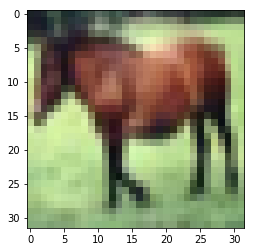

In [29]:
plt.imshow((x_train[0,:,:,:]+1)/2)

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,64,128,256]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.8
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002 #0.0002
        , generator_initial_dense_layer_size = (4, 4, 256)
        , generator_upsample = [2,2,2,1]
        , generator_conv_filters = [128,64, 64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1,1,1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002 #0.0002
        , optimiser = 'rmsprop'
        , z_dim = 100
        )




gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512] #
        , critic_conv_kernel_size = [5,5,5,5] 
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.8
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (4, 4, 512) #
        , generator_upsample = [2,2,2, 1] #
        , generator_conv_filters = [256,128,64,3] #
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1,1,1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8 #
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )




gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 256)         819456    
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_11 (Batc (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 8192)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 8, 8, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
__________

## training

In [11]:
print(gan.model.to_json(indent=4))

{
    "class_name": "Model",
    "config": {
        "name": "model_6",
        "layers": [
            {
                "name": "model_input",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        100
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "name": "model_input"
                },
                "inbound_nodes": []
            },
            {
                "name": "model_5",
                "class_name": "Model",
                "config": {
                    "name": "model_5",
                    "layers": [
                        {
                            "name": "generator_input",
                            "class_name": "InputLayer",
                            "config": {
                                "batch_input_shape": [
                                    null,
         

In [27]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , large_it_critic = 10
    , large_n_critic = 20
    , clip_threshold = 0.01
)

860 (5, 1) [D loss: (-0.000)(R -0.089, F 0.089)]  [G loss: -0.091] 
861 (5, 1) [D loss: (0.007)(R -0.094, F 0.101)]  [G loss: -0.088] 
862 (5, 1) [D loss: (0.004)(R -0.088, F 0.092)]  [G loss: -0.082] 
863 (5, 1) [D loss: (-0.003)(R -0.086, F 0.084)]  [G loss: -0.070] 
864 (5, 1) [D loss: (0.005)(R -0.086, F 0.092)]  [G loss: -0.062] 
865 (5, 1) [D loss: (-0.003)(R -0.080, F 0.077)]  [G loss: -0.052] 
866 (5, 1) [D loss: (-0.020)(R -0.084, F 0.064)]  [G loss: -0.041] 
867 (5, 1) [D loss: (-0.041)(R -0.088, F 0.047)]  [G loss: -0.027] 
868 (5, 1) [D loss: (-0.029)(R -0.079, F 0.050)]  [G loss: -0.030] 
869 (5, 1) [D loss: (-0.024)(R -0.086, F 0.062)]  [G loss: -0.036] 
870 (5, 1) [D loss: (-0.045)(R -0.095, F 0.050)]  [G loss: -0.038] 
871 (5, 1) [D loss: (-0.028)(R -0.085, F 0.058)]  [G loss: -0.031] 
872 (5, 1) [D loss: (-0.046)(R -0.084, F 0.038)]  [G loss: -0.028] 
873 (5, 1) [D loss: (-0.050)(R -0.085, F 0.035)]  [G loss: -0.016] 
874 (5, 1) [D loss: (-0.052)(R -0.094, F 0.042)]  [

981 (5, 1) [D loss: (-0.035)(R -0.091, F 0.056)]  [G loss: -0.056] 
982 (5, 1) [D loss: (-0.023)(R -0.091, F 0.068)]  [G loss: -0.062] 
983 (5, 1) [D loss: (-0.024)(R -0.088, F 0.063)]  [G loss: -0.038] 
984 (5, 1) [D loss: (-0.030)(R -0.082, F 0.052)]  [G loss: -0.046] 
985 (5, 1) [D loss: (-0.016)(R -0.078, F 0.062)]  [G loss: -0.036] 
986 (5, 1) [D loss: (-0.029)(R -0.084, F 0.055)]  [G loss: -0.027] 
987 (5, 1) [D loss: (-0.010)(R -0.078, F 0.068)]  [G loss: -0.045] 
988 (5, 1) [D loss: (-0.014)(R -0.069, F 0.055)]  [G loss: -0.034] 
989 (5, 1) [D loss: (-0.023)(R -0.063, F 0.040)]  [G loss: -0.028] 
990 (5, 1) [D loss: (0.008)(R -0.049, F 0.056)]  [G loss: -0.034] 
991 (5, 1) [D loss: (-0.008)(R -0.057, F 0.049)]  [G loss: -0.034] 
992 (5, 1) [D loss: (-0.000)(R -0.050, F 0.050)]  [G loss: -0.027] 
993 (5, 1) [D loss: (-0.030)(R -0.059, F 0.030)]  [G loss: -0.021] 
994 (5, 1) [D loss: (-0.021)(R -0.044, F 0.023)]  [G loss: -0.011] 
995 (5, 1) [D loss: (-0.013)(R -0.048, F 0.036)] 

1101 (5, 1) [D loss: (-0.006)(R -0.077, F 0.071)]  [G loss: -0.051] 
1102 (5, 1) [D loss: (-0.014)(R -0.070, F 0.056)]  [G loss: -0.024] 
1103 (5, 1) [D loss: (-0.016)(R -0.060, F 0.044)]  [G loss: -0.016] 
1104 (5, 1) [D loss: (-0.015)(R -0.063, F 0.048)]  [G loss: -0.017] 
1105 (5, 1) [D loss: (-0.008)(R -0.053, F 0.046)]  [G loss: -0.020] 
1106 (5, 1) [D loss: (-0.008)(R -0.070, F 0.062)]  [G loss: -0.032] 
1107 (5, 1) [D loss: (-0.016)(R -0.066, F 0.050)]  [G loss: -0.027] 
1108 (5, 1) [D loss: (-0.018)(R -0.074, F 0.056)]  [G loss: -0.031] 
1109 (5, 1) [D loss: (-0.035)(R -0.071, F 0.037)]  [G loss: -0.034] 
1110 (5, 1) [D loss: (-0.018)(R -0.074, F 0.056)]  [G loss: -0.037] 
1111 (5, 1) [D loss: (0.012)(R -0.059, F 0.071)]  [G loss: -0.040] 
1112 (5, 1) [D loss: (-0.019)(R -0.068, F 0.049)]  [G loss: -0.047] 
1113 (5, 1) [D loss: (-0.004)(R -0.057, F 0.053)]  [G loss: -0.043] 
1114 (5, 1) [D loss: (0.001)(R -0.061, F 0.061)]  [G loss: -0.039] 
1115 (5, 1) [D loss: (-0.004)(R -0.0

1220 (5, 1) [D loss: (-0.041)(R -0.058, F 0.017)]  [G loss: -0.011] 
1221 (5, 1) [D loss: (-0.025)(R -0.049, F 0.024)]  [G loss: -0.029] 
1222 (5, 1) [D loss: (-0.022)(R -0.054, F 0.032)]  [G loss: -0.038] 
1223 (5, 1) [D loss: (-0.001)(R -0.054, F 0.053)]  [G loss: -0.019] 
1224 (5, 1) [D loss: (-0.014)(R -0.056, F 0.042)]  [G loss: -0.014] 
1225 (5, 1) [D loss: (-0.025)(R -0.051, F 0.025)]  [G loss: 0.001] 
1226 (5, 1) [D loss: (-0.022)(R -0.055, F 0.033)]  [G loss: -0.006] 
1227 (5, 1) [D loss: (-0.013)(R -0.043, F 0.030)]  [G loss: -0.008] 
1228 (5, 1) [D loss: (0.001)(R -0.038, F 0.039)]  [G loss: -0.005] 
1229 (5, 1) [D loss: (-0.024)(R -0.058, F 0.035)]  [G loss: -0.009] 
1230 (5, 1) [D loss: (-0.036)(R -0.056, F 0.020)]  [G loss: -0.007] 
1231 (5, 1) [D loss: (-0.018)(R -0.045, F 0.028)]  [G loss: -0.016] 
1232 (5, 1) [D loss: (-0.011)(R -0.052, F 0.041)]  [G loss: -0.011] 
1233 (5, 1) [D loss: (-0.028)(R -0.051, F 0.023)]  [G loss: -0.017] 
1234 (5, 1) [D loss: (-0.017)(R -0.0

KeyboardInterrupt: 

In [ ]:
gan.epoch = 25

In [13]:
# Check weights updating

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN CRITIC ---')
noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
gen_imgs = gan.generator.predict(noise)
gan.train_critic(x_train, batch_size = BATCH_SIZE, using_generator = False, clip_threshold = 0.01)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN GENERATOR ---')
gan.train_generator(batch_size = BATCH_SIZE)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])

[(-0.095782675, 0.095626034), (-2.9154426e-10, 3.148589e-10), (0.9998601, 1.0001637)]
[(-0.010093124, 0.010069181), (-0.000309642, 0.0003970619), (-0.010086956, 0.010094264)]
--- TRAIN CRITIC ---
[(-0.095782675, 0.095626034), (-2.9154426e-10, 3.148589e-10), (0.9998601, 1.0001637)]
[(-0.01, 0.01), (-0.0003135199, 0.00039410882), (-0.01, 0.01)]
--- TRAIN GENERATOR ---
[(-0.09576379, 0.09561964), (-3.2374048e-10, 3.2418476e-10), (0.9998281, 1.0002006)]
[(-0.01, 0.01), (-0.0003135199, 0.00039410882), (-0.01, 0.01)]


In [24]:
check = True
while check :

    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    
    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
    gen_imgs = gan.generator.predict(noise)

    d_loss_real =   gan.critic.train_on_batch(true_imgs, valid)
    d_loss_fake =   gan.critic.train_on_batch(gen_imgs, fake)
    d_loss = (d_loss_real + d_loss_fake)

    for l in gan.critic.layers:
        weights = l.get_weights()
        weights = [np.clip(w, -0.01, 0.01) for w in weights]
        l.set_weights(weights)

    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)]" % (d_loss, d_loss_real, d_loss_fake))
    
      
    

[D loss: (-0.000)(R -0.065, F 0.065)]
[D loss: (-0.003)(R -0.063, F 0.060)]
[D loss: (-0.000)(R -0.063, F 0.063)]
[D loss: (-0.002)(R -0.060, F 0.058)]
[D loss: (-0.013)(R -0.065, F 0.053)]
[D loss: (-0.009)(R -0.063, F 0.053)]
[D loss: (-0.007)(R -0.061, F 0.054)]
[D loss: (-0.009)(R -0.058, F 0.050)]
[D loss: (-0.012)(R -0.059, F 0.047)]
[D loss: (-0.023)(R -0.064, F 0.041)]
[D loss: (-0.013)(R -0.054, F 0.042)]
[D loss: (-0.022)(R -0.059, F 0.037)]
[D loss: (-0.029)(R -0.058, F 0.029)]
[D loss: (-0.038)(R -0.065, F 0.027)]
[D loss: (-0.020)(R -0.053, F 0.034)]
[D loss: (-0.036)(R -0.056, F 0.021)]
[D loss: (-0.031)(R -0.057, F 0.027)]
[D loss: (-0.032)(R -0.052, F 0.020)]
[D loss: (-0.028)(R -0.053, F 0.025)]
[D loss: (-0.044)(R -0.060, F 0.017)]
[D loss: (-0.040)(R -0.057, F 0.017)]
[D loss: (-0.044)(R -0.054, F 0.009)]
[D loss: (-0.050)(R -0.060, F 0.010)]
[D loss: (-0.066)(R -0.064, F -0.002)]
[D loss: (-0.060)(R -0.062, F 0.002)]
[D loss: (-0.049)(R -0.045, F -0.004)]
[D loss: (

KeyboardInterrupt: 

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.3f]" % (g_loss))
    
    g_loss = gan.model.test_on_batch(noise, valid)
    print ("[G loss: %.3f]" % (g_loss))
    print('-------')
    


In [ ]:
noise = np.random.normal(0, 1, (BATCH_SIZE,100))
img = gan.generator.predict(np.array([noise[0]]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

In [ ]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
img = x_train[idx]
print(gan.critic.predict(np.array([img]))[0])
plt.imshow((img + 1) * 0.5)

In [ ]:
valid = np.ones((BATCH_SIZE,1))
noise = np.random.normal(0, 1, (BATCH_SIZE,100))

In [ ]:
print(gan.model.test_on_batch(noise, valid))

In [ ]:
print(gan.model.train_on_batch(noise, valid))

In [ ]:
valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty

true_imgs = next(x_train)[0]

In [ ]:
print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))


In [ ]:
print(gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy]))

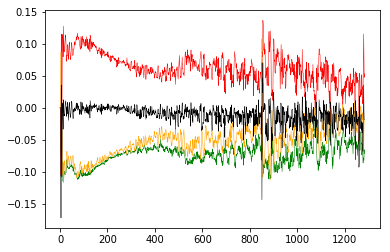

In [28]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=0.5)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5)